In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnistdata.loader import MNIST
from sklearn.manifold import TSNE
from aae import Z_SIZE, e, g, z_batch

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 784], name='x')
pz = tf.placeholder(tf.float32, [None, Z_SIZE], name='pz')
z = e(x)
xr = g(z)
xg = g(pz)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')

In [6]:
examples = 3
x_batch, _ = mnist.next_batch(examples)
xr_batch = sess.run(xr, {x: x_batch})

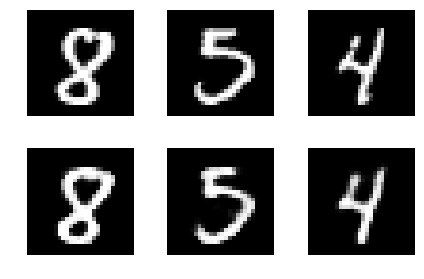

In [7]:
fig, axs = plt.subplots(2, examples)
fi = 0
for i in range(examples):
    axs[0, i].imshow(x_batch[fi].reshape([28, 28]), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(xr_batch[fi].reshape([28, 28]), cmap='gray')
    axs[1, i].axis('off')
    fi += 1
fig.tight_layout()
plt.show()

In [8]:
test_xz = sess.run(z, {x: mnist.test_imgs})

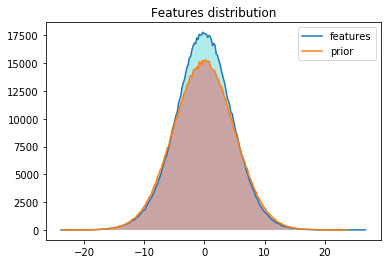

In [9]:
values_xz, bins_xz = np.histogram(test_xz.flatten(), bins=250)
values_z, bins_z = np.histogram(z_batch(mnist.test_imgs.shape[0]).flatten(), bins=250)
plt.plot(bins_xz[:-1], values_xz)
plt.plot(bins_z[:-1], values_z)
plt.fill(bins_xz[:-1], values_xz, 'c', bins_z[:-1], values_z, 'r', alpha=0.3)
plt.title('Features distribution')
plt.legend(['features', 'prior'])
plt.show()

In [10]:
z2d = TSNE(n_iter=300).fit_transform(test_xz)

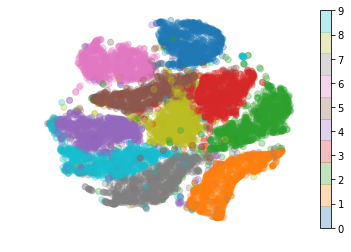

In [11]:
plt.scatter(z2d[:, 0], z2d[:, 1], c=mnist.test_labels, cmap='tab10', alpha=0.3)
plt.axis('off')
plt.colorbar()
plt.show()

Generations


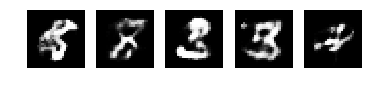

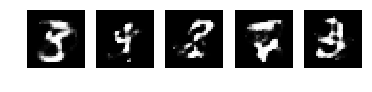

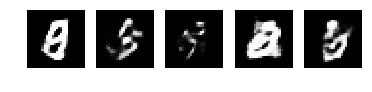

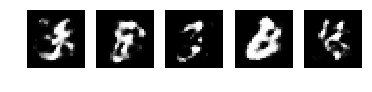

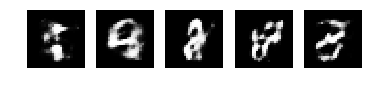

In [34]:
def generations(count, examples):
    for _ in range(examples):
        xg_batch = sess.run(xg, {pz: z_batch(examples)})
        fig, axs = plt.subplots(1, examples)
        for i in range(examples):
            axs[i].imshow(xg_batch[i].reshape([28, 28]), cmap='gray')
            axs[i].axis('off')
    plt.show()

print('Generations')
generations(3, 5)